# MNIST Classifiers Project
This notebook demonstrates three MNIST classifiers:  
1. Random Forest  
2. Feedforward Neural Network (Keras)  
3. Convolutional Neural Network (Keras)  

The notebook covers data loading, preprocessing, training, prediction, and visualization.  
All code is commented for clarity.


# Setup src folder

In [1]:
import sys
import os

# Dynamically determine the 'src' folder path relative to notebook location
notebook_dir = os.getcwd()  # current notebook working directory
src_path = os.path.abspath(os.path.join(notebook_dir, '..', 'src'))

# Check if 'src' folder exists
if not os.path.exists(src_path):
    raise FileNotFoundError(f"'src' folder not found at: {src_path}")

# Add src folder to Python path
sys.path.append(src_path)

# List files in src for verification
print("Files in src:", os.listdir(src_path))  
# Expected: ['interface.py', 'random_forest.py', 'feedforward.py', 'cnn.py', 'classifier.py']

# Import unified MNIST classifier wrapper
from classifier import MnistClassifier
print("Import successful ✅")


Files in src: ['.ipynb_checkpoints', 'classifier.py', 'cnn.py', 'feedforward.py', 'interface.py', 'random_forest.py', '__pycache__']
Import successful ✅


# Imports

In [2]:
# Libraries for data handling, visualization, and metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# MNIST classifier wrapper
from classifier import MnistClassifier


# Load and visualize MNIST


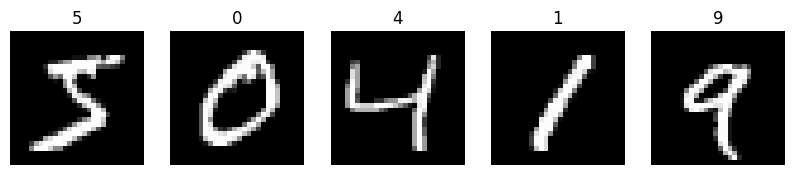

In [3]:
# Download MNIST dataset (70,000 samples, 28x28 pixels)
mnist = fetch_openml('mnist_784', version=1)

# Normalize pixel values to [0,1] and convert labels to integers
X, y = mnist.data / 255.0, mnist.target.astype(int)

# Visualize the first 5 digits
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.title(str(y.iloc[i]))
    plt.axis('off')
plt.show()


# Split dataset

In [4]:
# Split the MNIST dataset into training and testing sets.
# 80% of the data is used for training, 20% for testing.
# random_state ensures reproducibility of the split.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,          # feature matrix
    y,          # labels
    test_size=0.2,  # proportion of test set
    random_state=42 # fixed seed for reproducibility
)


# Random Forest


In [5]:
# Initialize the MNIST classifier with the Random Forest algorithm
clf_rf = MnistClassifier("rf")

# Train the Random Forest model on the training set
clf_rf.train(X_train, y_train)

# Predict labels for the test set
preds_rf = clf_rf.predict(X_test)

# Evaluate the model's accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, preds_rf))


Random Forest Accuracy: 0.9675


# Feedforward Neural Network


In [6]:
# Initialize the MNIST classifier with the Feedforward Neural Network algorithm
clf_nn = MnistClassifier("nn")

# Train the Feedforward NN on the training set
# You can specify epochs and batch_size if needed, e.g., epochs=5, batch_size=32
clf_nn.train(X_train, y_train)

# Predict labels for the test set
preds_nn = clf_nn.predict(X_test)

# Evaluate the model's accuracy
print("Feedforward NN Accuracy:", accuracy_score(y_test, preds_nn))


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9271 - loss: 0.2442
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9691 - loss: 0.0995
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9778 - loss: 0.0699
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9831 - loss: 0.0530
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9865 - loss: 0.0414
Feedforward NN Accuracy: 0.9734285714285714


# Convolutional Neural Network

In [7]:
# Reshape data for CNN input
# CNN expects images with shape (num_samples, 28, 28, 1)
X_train_cnn = X_train.values.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.values.reshape(-1, 28, 28, 1)

# Initialize the MNIST classifier with the CNN algorithm
clf_cnn = MnistClassifier("cnn")

# Train the CNN model on the reshaped training set
clf_cnn.train(X_train_cnn, y_train)

# Predict labels for the reshaped test set
preds_cnn = clf_cnn.predict(X_test_cnn)

# Evaluate the model's accuracy
print("CNN Accuracy:", accuracy_score(y_test, preds_cnn))


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9546 - loss: 0.1443
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9856 - loss: 0.0462
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9898 - loss: 0.0326
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9927 - loss: 0.0233
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9942 - loss: 0.0176
CNN Accuracy: 0.9901428571428571


# Visualize Predictions Random Forest


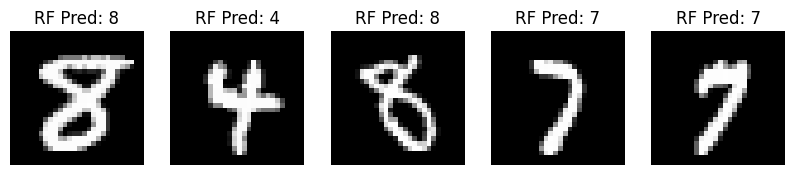

In [8]:
import matplotlib.pyplot as plt

# Visualize the first 5 test images and their predicted labels

plt.figure(figsize=(10, 4))  # set figure size

for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # reshape for display
    plt.title(f"RF Pred: {preds_rf[i]}")  # display predicted label
    plt.axis('off')  # hide axes for better visualization

plt.show()


In [9]:
# Visualize Predictions Feedforward Neural Network


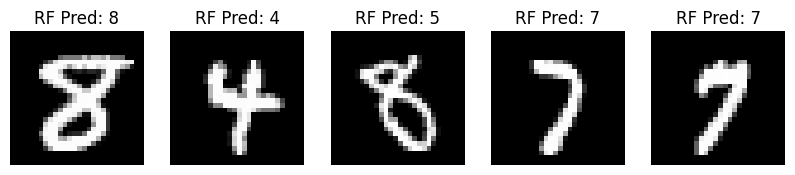

In [10]:
import matplotlib.pyplot as plt

# Visualize the first 5 test images and their predicted labels

plt.figure(figsize=(10, 4))  # set figure size

for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # reshape for display
    plt.title(f"RF Pred: {preds_nn[i]}")  # display predicted label
    plt.axis('off')  # hide axes for better visualization

plt.show()


# Visualize Predictions Convolutional Neural Network


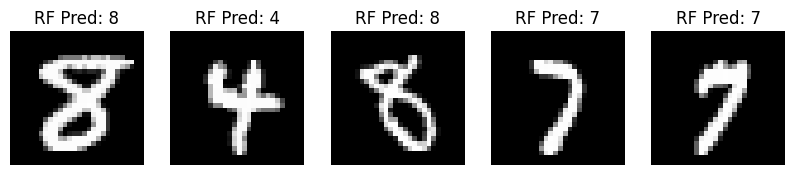

In [11]:
import matplotlib.pyplot as plt

# Visualize the first 5 test images and their predicted labels

plt.figure(figsize=(10, 4))  # set figure size

for i in range(5):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # reshape for display
    plt.title(f"RF Pred: {preds_cnn[i]}")  # display predicted label
    plt.axis('off')  # hide axes for better visualization

plt.show()
